In [25]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from PIL import Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
def fix_csv(metadata):
    """
    Fix the paths in the metadata CSV by replacing incorrect parts of the path
    
    Removes NaN rows in the metadata CSV.
    """
    metadata.dropna(inplace=True) # remove missing values

    # Replace the incorrect directory name with the correct one
    metadata['path_to_image'] = metadata['path_to_image'].apply(
        lambda x: x.replace('BreaKHis_v1/', 'BreaKHis_v1 2/')
    )
    
    return metadata

In [27]:
# DEFINE DIRECTORY PATH FOR DATASET (\DeepLearning24_25\)
# ---------------------------------
source_directory = r"D:\DeepLearning24_25"
# ---------------------------------
path_img_metadata = os.path.join(source_directory, 'BreaKHis_v1 2/histology_slides/breast/image_data.csv')
img_metadata_df = pd.read_csv(path_img_metadata)

In [28]:
img_metadata_df.isnull().sum()

path_to_image          0
Benign or Malignant    3
Cancer Type            4
Magnification          4
dtype: int64

In [29]:
img_metadata_df = fix_csv(img_metadata_df)
img_metadata_df.head(3)

,path_to_image,Benign or Malignant,Cancer Type,Magnification
0,BreaKHis_v1 2/histology_slides/breast/benign/S...,Benign,Adenosis,100X
1,BreaKHis_v1 2/histology_slides/breast/benign/S...,Benign,Adenosis,100X
2,BreaKHis_v1 2/histology_slides/breast/benign/S...,Benign,Adenosis,100X


In [30]:
img_metadata_df.isnull().sum()

path_to_image          0
Benign or Malignant    0
Cancer Type            0
Magnification          0
dtype: int64

In [31]:
# add location of the image to the dataframe (using last bit of path_to_image and searching for it in the train/test/val folders inside the data folder)

img_metadata_df['image_name'] = img_metadata_df['path_to_image'].apply(lambda x: x.split('/')[-1])
img_metadata_df['image_location'] = img_metadata_df.apply(
    lambda row: 'Train' if os.path.exists(os.path.join('data', row['Magnification'], 'train', row['image_name'])) 
    else 'Test' if os.path.exists(os.path.join('data', row['Magnification'], 'test', row['image_name'])) 
    else 'Val' if os.path.exists(os.path.join('data', row['Magnification'], 'val', row['image_name'])) 
    else 'Not_Found',
    axis=1
)

img_metadata_df.head(3)

,path_to_image,Benign or Malignant,Cancer Type,Magnification,image_name,image_location
0,BreaKHis_v1 2/histology_slides/breast/benign/S...,Benign,Adenosis,100X,SOB_B_A-14-22549AB-100-011.png,Train
1,BreaKHis_v1 2/histology_slides/breast/benign/S...,Benign,Adenosis,100X,SOB_B_A-14-22549AB-100-005.png,Test
2,BreaKHis_v1 2/histology_slides/breast/benign/S...,Benign,Adenosis,100X,SOB_B_A-14-22549AB-100-004.png,Test


In [35]:
# count values of image_location
for magnification in img_metadata_df['Magnification'].unique():
    print(f"Magnification: {magnification}")
    counts = img_metadata_df[img_metadata_df['Magnification'] == magnification]['image_location'].value_counts()
    print(counts)
    print(f"Total: {counts.sum()}\n")

Magnification: 100X
Train    1456
Test      312
Val       312
Name: image_location, dtype: int64
Total: 2080

Magnification: 400X
Train    1273
Val       273
Test      273
Name: image_location, dtype: int64
Total: 1819

Magnification: 40X
Train    1395
Test      300
Val       299
Name: image_location, dtype: int64
Total: 1994

Magnification: 200X
Train    1408
Test      302
Val       302
Name: image_location, dtype: int64
Total: 2012



**IMPORTANT:** run `setup_data.py`

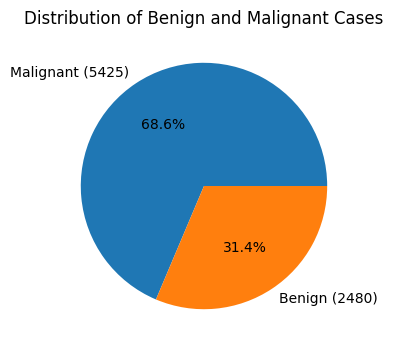

In [10]:
class_counts = img_metadata_df['Benign or Malignant'].value_counts()
class_counts.plot(kind='pie', figsize=(8, 4), autopct='%1.1f%%', labels=[f'{label} ({count})' for label, count in zip(class_counts.index, class_counts)])
plt.ylabel('')
plt.title('Distribution of Benign and Malignant Cases')
plt.show()

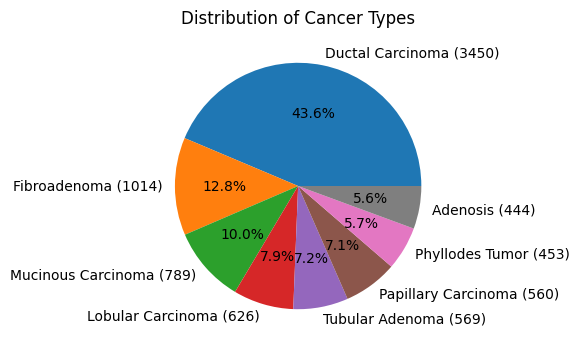

In [11]:
cancer_type_counts = img_metadata_df['Cancer Type'].value_counts()
cancer_type_counts.plot(kind='pie', figsize=(8, 4), autopct='%1.1f%%', labels=[f'{label} ({count})' for label, count in zip(cancer_type_counts.index, cancer_type_counts)])
plt.ylabel('')
plt.title('Distribution of Cancer Types')
plt.show()

In [12]:
def check_image_resolutions(metadata):
    resolutions = []
    for idx, row in metadata.iterrows():
        full_image_path = os.path.join('data', row['image_location'].lower(), row['image_name'])
        try:
            with Image.open(full_image_path) as img:
                resolutions.append(img.size)
        except Exception as e:
            print(f"Error loading image {full_image_path}: {e}")
    return resolutions

resolutions = check_image_resolutions(img_metadata_df)
resolutions_df = pd.DataFrame(resolutions, columns=['width', 'height'])
print("\nImage Resolutions:\n", resolutions_df.describe())


Image Resolutions:
         width       height
count  7905.0  7905.000000
mean    700.0   459.962555
std       0.0     0.385221
min     700.0   456.000000
25%     700.0   460.000000
50%     700.0   460.000000
75%     700.0   460.000000
max     700.0   460.000000


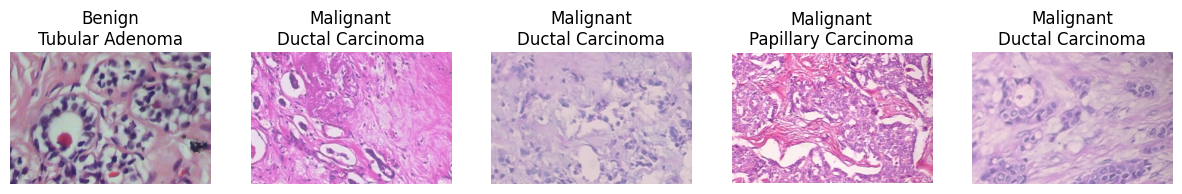

In [13]:
def visualize_samples(metadata, num_samples=5):
    samples = metadata.sample(num_samples)
    plt.figure(figsize=(15, 5))
    for i, (idx, row) in enumerate(samples.iterrows()):
        full_image_path = os.path.join('data', row['image_location'].lower(), row['image_name'])
        img = Image.open(full_image_path)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f"{row['Benign or Malignant']}\n{row['Cancer Type']}")
        plt.axis('off')
    plt.show()

visualize_samples(img_metadata_df)